# 第10回 アルゴリズム入門：問題の複雑さ

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tsuboshun/begin-python/blob/gh-pages/_sources/workbook/lecture10.ipynb)

___

## この授業で学ぶこと

前回の授業で挿入ソートとクイックソートを紹介し、それらの実行速度に差があることを見た。特にデータ数を増やしたときの実行時間の増え方に大きな差があることを見た。今回は、アルゴリズムの実行時間を見積もるための考え方である計算量について学び、前回の結果について理解を深める。

## 計算量とは

**計算量**（computational complexity）とは、問題サイズ $N$ （例えば入力データの大きさなど）に対して計算ステップ数がどのように増えるかを表す指標である。
計算量はアルゴリズムの実行時間を見積もるために使われる。

例として、次の2つのプログラムの実行時間を考える。

In [ ]:
def single_loop(N):
    count = 0
    for i in range(N):
        count += 1
    return count

In [ ]:
def double_loop(N):
    count = 0
    for i in range(N):
        for j in range(N):
            count += 1
    return count

引数 `N` でループ回数を受け取り、`simple_loop()` は一重ループ、`double_loop()` は二重ループで単純な足し算を実行する。
これらの関数の実行時間を次の `exec_time()` で測定してみよう。

In [ ]:
import time

def exec_time(func, N):
    start = time.time()
    func(N)
    end = time.time()
    return end - start

In [ ]:
N = 10 ** 3
print(f"single_loopの実行時間： {exec_time(single_loop, N)}")
print(f"double_loopの実行時間: {exec_time(double_loop, N)}")

`N` の値と実行時間の関係を調べてみると、Google Colabの環境では次のようになった（合計の列は後の説明で使う）。

| `N`  |  `single_loop(N)` の実行時間（秒） |  `double_loop(N)` の実行時間（秒） | 合計 |
| ---- | ---- | ---- | ---- |
| 100  |  0.00000429  | 0.000491 | 0.000495 |
| 1000  |  0.0000438  | 0.0296 | 0.0296 |
| 10000  |  0.000513  | 4.00 | 4.00 |
| 100000  |  0.00373  | 344 | 344 | 

$N$ が10倍になると、`single_loop(N)` の実行時間はおよそ10倍、`double_loop(N)` の実行時間はおよそ100倍に増えることがわかる。

これは次のように理解できる。`single_loop(N)` では `count = 0` を1回実行し、`count += 1` を $N$ 回実行している。$N$ が十分大きいとき、全体の計算ステップ数はほぼ $N$ に比例するので、$N$ が10倍になると実行時間もおよそ10倍になる。一方で、`double_loop(N)` では `count = 0` を1回実行し、`count += 1` を $N^2$ 回実行している。$N$ が十分大きいとき、全体の計算ステップ数はほぼ $N^2$ に比例するので、$N$ が10倍になると実行時間はおよそ100倍になる。

このような問題サイズ `N` と計算ステップ数の関係について、 `single_loop(N)` の計算量は $O(N)$、`double_loop(N)` の計算量は $O(N^2)$ であると言う。この記法はランダウ（Landau）のオーダー記法と呼ばれており、例えば $O(N)$ はオーダー$N$と読む。

計算量がわかると、大まかな実行時間の見積もりができる。例えば、`double_loop(N)` は $N = 10^5$ のとき $6$ 分くらいかかっているので、その $10$ 倍の $N = 10^6$ のとき $6\times 10^2 = 600$ 分（つまり $10$ 時間！）くらいかかるだろうと見積もることができる。一般的には、表の結果を踏まえると、計算ステップ数 $10^7\sim10^8$ につき $1$ 秒程度かかると見積もることができる。もちろんこれはプログラムの内容やアルゴリズム、実行環境にも依るので、大まかな見積もりではあるが、実際にプログラムを書く前に実行時間のあたりをつけるのに役立つ。

```{admonition} 発展的な話題： 関数もオブジェクト
:class: note
第4回の授業で「Pythonに出てくるほとんど全ての要素はオブジェクトとして作られている」と説明したが、関数も例外ではない。関数もオブジェクトであり、一種のデータとして扱うことができる。したがって、その他のデータと同じく変数に代入することもできる。
<pre>func = single_loop
func(10**2)  # これはsingle_loop(10**2)と同じ！</pre>
`exec_time()` では引数 `func` で関数を受け取り、`exec_time()` の内部で `func(N)` と実行している。このようなことが可能なのも、関数がオブジェクトとして作られているからである。
```

### オーダー記法について

計算量のオーダー記法について次の2点を補足する。
1. オーダー記法では定数倍の寄与は考えない
2. オーダー記法では低次の項の寄与は考えない  

1つ目については、例えば計算ステップ数が $2N$ であったとしたとしても、オーダー記法としては $O(N)$ と書くということである。
これは定数倍があったとしても、問題サイズ $N$ が増えたときの計算量の増え方には関係がないからである。つまり、問題サイズが $N'$ に増えたとして、計算ステップ数の比を考えると $(cN') / (cN) = N' / N$ というように定数倍 $c$ はあってもなくても変わらない。

2つ目については、例えば計算ステップ数が $N^2 + N$ であったとしても、オーダー記法としては $O(N^2)$ と書くということである。
これは実行時間が問題になるような $N$ の大きい領域では、低次の $O(N)$ の寄与はほとんど無視できるからである。
例えば、`single_loop(N)` と `double_loop(N)` の両方を実行するプログラムを考えると、計算ステップ数はおよそ $N^2 + N$ になる。
このプログラムの実行時間は `single_loop(N)` と `double_loop(N)` の実行時間の和になるが、先ほどの表を参照すると、これは `double_loop(N)` の実行時間とほとんど変わらない。

## 計算量の比較

この節では、計算量でよく出てくる関数についてまとめて説明し、それらの増加速度の比較を行う。

まず対数関数 $\log$ について復習しておこう。
$\log_b x$ は $x$ を $b^z$ と表したときの $z$ の値と定義されるのであった。
このテキストでは対数の底 $b$ は常に2として、表記からも省略することにする。

いくつかの $N$ の値に対する $\log N$ の値は、次の表のとおりである。

| $N$  | $N$（指数表記） | $\log N$ | 
| ---- | ---- | ---- | 
| 1  | $2^0$ |  0  | 
| 2  | $2^1$ |  1  |
| 4  | $2^2$ |  2  |
| 32  | $2^5$  |  5  |
| 1024  | $2^{10}$ |  10  |
| 1048576  | $2^{20}$ |  20  |

定義や上の表から想像できるとおり、$y = \log N$ のグラフは $y = 2^N$ のグラフの横軸と縦軸を入れ替えたものに一致する。
以下に2つの関数のプロットを示す。

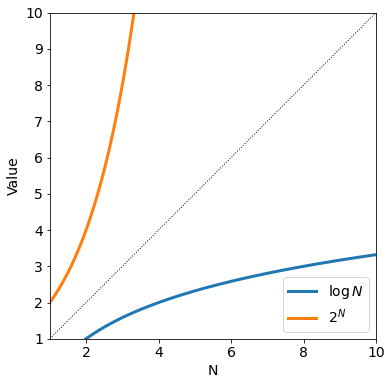

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
plt.rcParams.update({'font.size': 14})

# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(10, 6))

# データの用意
n = np.linspace(1, 10, 400)
logn = np.log2(n)
two_power_n = 2**n

# 折れ線グラフのプロット
ax.plot(n, logn, linewidth=3, label=r'$\log N$')
ax.plot(n, two_power_n, linewidth=3, label=r'$2^N$')
ax.plot(n, n, linewidth=1, linestyle="dotted", color='k')

# 軸の設定など
ax.set_xlabel('N')
ax.set_ylabel('Value')
ax.set_xlim(1, 10)
ax.set_ylim(1, 10)
ax.set_aspect('equal', adjustable='box')  # 横軸と縦軸のスケールを等しくする
plt.legend() # 凡例の表示

# 表示
plt.show()

$y = 2^N$ のような累乗で表される関数を**指数関数**という。第2回で紹介したとおり、指数関数は $N$ を増やすと値が急激に増える。
逆に対数関数は $N$ を増やしても値が全然増えない。
実際、$N = 1024$ のとき $\log N = 10$、$N = 1048576$ のとき $\log N = 20$ であるが、$N$ の増加分に対して $\log N$ の増加分はごく僅かである。

さて、計算量によく出てくる関数として $N$、$N\log N$、$N^2$、$2^N$、$N!$ などが挙げられる。
$N$ を増やしたときの値の増え方は後ろのものほど急である。
（念のため階乗 $N!$ について復習しておくと $N! = N\cdot (N-1)\cdots 2\cdot 1$ であり、例えば $3! = 6$、$4! = 24$ である。）

以下に5つの関数のプロットを示す。

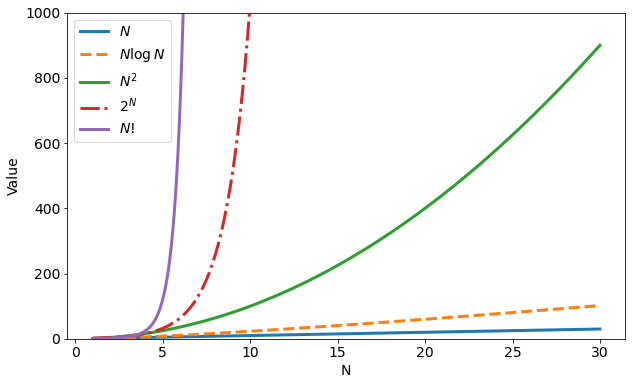

In [2]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(10, 6))

# データの用意
n = np.linspace(1, 30, 400)
nlogn = n * np.log(n)
n_squared = n ** 2
two_power_n = 2 ** n
n_factorial = scipy.special.factorial(n)

# 折れ線グラフのプロット
ax.plot(n, n, linewidth=3, label=r'$N$')
ax.plot(n, nlogn, linewidth=3, linestyle='dashed', label=r'$N\log N$')
ax.plot(n, n_squared, linewidth=3, label=r'$N^2$')
ax.plot(n, two_power_n, linewidth=3, linestyle='dashdot', label=r'$2^N$')
ax.plot(n, n_factorial, linewidth=3, label=r'$N!$')

# 軸の設定など
ax.set_ylim(0, 10**3)
ax.set_xlabel('N')
ax.set_ylabel('Value')
plt.legend() # 凡例の表示

# 表示
plt.show()

プロットから次のような点が読み取れるだろう。
- $N$ と $N\log N$ の増え方はあまり変わらない
- $N^2$ はこれらより明らかに増加スピードが速いが、$2^N$ や $N!$ ほどではない
- $N!$ は $2^N$ 以上に増加スピードが速い

関数値を計算ステップ数とみなすとき、計算時間に換算するとどれくらいの値になるだろうか。
1秒あたり $10^8$ の計算ステップをこなせるとして、各関数値を計算時間（秒単位）に換算したのが次の表である（参考までに $\log N$、$N^4$ の場合も載せている）。

In [3]:
import pandas as pd
from decimal import Decimal, getcontext
# Decimalの精度を10桁とする
getcontext().prec = 10

speed = 10**8  # 1秒あたり計算ステップ数
n = np.array([10, 20, 30, 40, 50, 100, 1000, 10000])
n_col = n / speed
logn = np.log2(n) / speed
nlogn = n * np.log2(n) / speed
n_squared = n ** 2 / speed
n_fourth = n ** 4 / speed
power_of_two = np.array([Decimal(2) ** i / speed for i in n]) # 2**nと書くと桁あふれを起こす
n_factorial = scipy.special.factorial(n) / speed

# pandasのデータフレーム（第13回で学ぶ）
df = pd.DataFrame({'ind': n, '\log N': logn, 'N': n_col, 'N\log N': nlogn, 'N^2': n_squared, 'N^4': n_fourth, '2^N': power_of_two, 'N!': n_factorial})

def highlight(s):
    day = 24 * 3600
    universe_age = 138 * 10**8 * 365 * day #宇宙年齢: 138億年
    return ['background-color: gray' if (e > universe_age) else ('background-color: gold' if e > day else '') for e in s]

df.columns = ['Nの大きさ'] + ['<span class="math notranslate nohighlight">\('+col+'\)</span>' for col in df.columns[1:]]
df = df.set_index('Nの大きさ')
df.style.\
    apply(highlight).\
    format({c: "{:.1e}" for c in df.columns}).\
    set_table_attributes('style="font-size: 14px"')

,\(\log N\),\(N\),\(N\log N\),\(N^2\),\(N^4\),\(2^N\),\(N!\)
Nの大きさ,,,,,,,
10,3.3e-08,1.0e-07,3.3e-07,1.0e-06,1.0e-04,1.0e-5,3.6e-02
20,4.3e-08,2.0e-07,8.6e-07,4.0e-06,1.6e-03,1.0e-2,2.4e+10
30,4.9e-08,3.0e-07,1.5e-06,9.0e-06,8.1e-03,1.1e+1,2.7e+24
40,5.3e-08,4.0e-07,2.1e-06,1.6e-05,2.6e-02,1.1e+4,8.2e+39
50,5.6e-08,5.0e-07,2.8e-06,2.5e-05,6.2e-02,1.1e+7,3.0e+56
100,6.6e-08,1.0e-06,6.6e-06,1.0e-04,1.0e+00,1.3e+22,9.3e+149
1000,1.0e-07,1.0e-05,1.0e-04,1.0e-02,1.0e+04,1.1e+293,inf
10000,1.3e-07,1.0e-04,1.3e-03,1.0e+00,1.0e+08,2.0e+3002,inf


数値は指数表示で表現している。例えば、`3.6e-2` は $3.6\times10^{-2} = 0.036$ という意味であり、`2.0e+01` は $2.0\times 10^1 = 20$、`1.0e+00` は $1.0\times 10^0 = 1$ という意味である。$N!$ の最後の2マスについては、あまりに桁が大きいため `inf` （無限）と表示されている。

わかりやすさのため計算時間が1日を超えているマスを黄色、さらに宇宙年齢（138億年）を超えているマスを灰色で色付けした。
なんと$2^N$ と $N!$ の値は一瞬にして宇宙年齢相当を超えることがわかる！
計算量が $O(2^N)$ や $O(N!)$ のアルゴリズムは、比較的小さいサイズの問題でも現実的な時間で解を得られなくなるということである。

このように $2^N$ や $N!$ の増加速度は他と一線を画するので、計算量の世界ではこれらは他と区別される。アルゴリズムの計算量が $O(2^N)$ や $O(N!)$ のように（増加速度に関して）指数関数以上のとき **指数時間**、そうではなく $N$、$N\log N$、$N^2$ のように多項式関数以下のとき **多項式時間** であるという。

```{admonition} 指数時間の現れる例
:class: note
コンピュータを宇宙誕生の瞬間から動かし続けても解けない問題・アルゴリズムの組み合わせなどあり得るのかと不思議に思うかもしれない。しかし実際には、さらに一歩踏み込んで、指数時間のアルゴリズムしか見つからないだろうと予想されている問題が数多く存在する。

その有名な例が、**巡回セールスマン問題**と呼ばれる問題である。これは簡単に言えば、営業マンが担当する $N$ 人の顧客のもとを1回ずつ訪れて出発点に戻ることを考えたときに、顧客のもとをどの順番で回れば最短経路になるのかという問題である。この問題は基本的に全ての巡回方法をしらみつぶしに調べるか、それに近い方法を取らないと解を求めることができないと考えられている。結果として、指数時間のアルゴリズムしか見つかっていない。したがって実践的には、厳密な最適解を求めるのはあきらめて、最適解に近い解を求めようとするアプローチがしばしば取られる。

このように指数時間のアルゴリズムしか見つかっていない問題は、「全ての可能性をしらみつぶしに調べないと解けない問題」であることが多い。一方で、多項式時間のアルゴリズムの存在する問題は、簡単には「効率的に解くコツの存在する問題」ということができる[^f1]。
```

[^f1]: これら2種類の問題を数学的にきちんと区別するために、P・NPといった分類が定義されている。本当はこの分類の話を授業のメインにしようと考えて、シラバス作成時に「問題の複雑さ」というタイトルをつけたが、計算量の話だけでも十分なボリュームになったのでこれ以上踏み込まないことにする。より詳しく学びたい人には[こちら](https://qiita.com/drken/items/5187e49082f7437349c2)の解説記事がお勧めである。

## ソートアルゴリズムの計算量

それでは、先週学んだ挿入ソートとクイックソートについて計算量を確認してみよう。これらのアルゴリズムでは、`single_loop()` や `double_loop()` と違って、入力データの並び順によって計算ステップ数が大きく変わりうる。そこで最悪なケースにおける計算量を **最悪計算量**、平均的なケースにおける計算量を **平均計算量** として区別して考える。

挿入ソートとクイックソートの計算量は以下の通りである。

|   |  挿入ソート  |  クイックソート | 
| ---- | ---- | ---- |
| 最悪計算量 |  $O(N^2)$  | $O(N^2)$ |
| 平均計算量  |  $O(N^2)$  | $O(N\log N)$ |

平均計算量についてはクイックソートの方が小さいことがわかる。
前回の授業で、クイックソートの方が挿入ソートより高速に動作することを見たが、平均計算量の違いが実行時間の差につながっていたわけである。

例えば、これらの計算量から平均的なケースにおいて、挿入ソートは $N = 10^4$ で数秒かかり、クイックソートは $N = 10^6$ で数秒かかると予想できる。なぜなら、先ほど「計算ステップ数 $10^7\sim10^8$ につき $1$ 秒程度かかる」と書いたが、$N = 10^4$ で $N^2 = 10^8$ となり、$N = 10^6$ で $N\log N = 2\times 10^7$ となるからである。もちろん計算量は定数倍の違いや低次項の寄与を考えていないので、計算ステップ数とはそれなりに差がある。それでも、前回のノートブック上で実際に測定してみると、大体当たっていることが確かめられる。

挿入ソートの計算量の求め方を説明する。
`insert_sort()` 関数のfor文に着目する。変数 `i` は1からN-1までを動くが、それぞれの `i` の値に対して内側のwhile文は、最悪のケースで `i` 回実行される（{numref}`insert_sort`の3段目の状況）。したがって、全体の計算ステップ数は

$$
1 + 2 + ... + N-1 = \frac{N(N-1)}{2}
$$

により $N(N-1)/2$ 回と求められる[^f2]。よって、定数倍や低次項を落としてオーダー表記に直すと、最悪計算量は $O(N^2)$ となる。

[^f2]: `single_loop()` や `double_loop()` のときとは異なり、ここではループ1回を1ステップとして計算ステップ数を求めている。代入などの演算単位で数えたとしても定数倍の違いでしかないので、計算量を求める上ではこれで問題ない。

平均計算量の求め方もほぼ同様である。最悪の場合は、各 `i` につき内側のwhile文が `i` 回実行されると説明したが、平均的にはその半分の回数実行されると考えられる。したがって、全体の平均的な計算ステップ数は、先ほどの結果を2で割った $N(N-1)/4$ 回と求められる。よって、平均計算量は $O(N^2)$ となる。

次にクイックソートの計算量の求め方を説明する。きちんと説明しようとすると少し複雑な数式が出てくるので、ここではざっくりとした直感的な説明を行う。
`quick_sort()` 関数のfor文に着目すると、これは `right - left + 1` 回、つまり {numref}`quick_sort1` の青の領域の長さ分だけ実行される。
したがって、{numref}`quick_sort1` の各段の計算ステップ数は、多めに見積もって $O(N)$ である。
あとは {numref}`quick_sort1` の段数を見積もって掛け算すればよい。

各段における `quick_sort()` の適用範囲の長さの最大値は、最悪のケースでは再帰1回につき1つずつしか減らない（どのような入力データでそうなるだろうか？）。したがって、最も多いケースで {numref}`quick_sort1` の段数は $O(N)$ である。
よって、全体の最悪計算量は $O(N^2)$ となる。

各段における `quick_sort()` の適用範囲の長さの最大値は、最良のケースでは再帰1回につき半分になるので、最も少ないケースではおよそ $O(\log N)$ 段になる。実は平均的なケースでも $O(\log N)$ 段であることを示すことができる。
よって、全体の平均計算量は $O(N\log N)$ となる。